#  Média de Horas-aula diária


## Carregando o conjunto de dados

In [2]:
import pandas as pd

had = pd.read_excel('datasets/HAD_BRASIL_REGIOES_UFS_2024.xlsx', skiprows=8)
had

C:\Users\raiss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


,NU_ANO_CENSO,UNIDGEO,NO_CATEGORIA,NO_DEPENDENCIA,ED_INF_CAT_0,CRE_CAT_0,PRE_CAT_0,FUN_CAT_0,FUN_AI_CAT_0,FUN_AF_CAT_0,...,FUN_06_CAT_0,FUN_07_CAT_0,FUN_08_CAT_0,FUN_09_CAT_0,MED_CAT_0,MED_01_CAT_0,MED_02_CAT_0,MED_03_CAT_0,MED_04_CAT_0,MED_NS_CAT_0
0,2024,Brasil,Total,Total,6.2,7.6,5.1,5.1,5.0,5.3,...,5.3,5.3,5.4,5.4,5.8,6.0,5.8,5.6,5.2,4.7
1,2024,Brasil,Urbana,Total,6.4,7.8,5.2,5.2,5.0,5.4,...,5.4,5.3,5.4,5.4,5.8,6.0,5.8,5.6,4.8,4.6
2,2024,Brasil,Rural,Total,5.0,5.7,4.7,5.1,5.0,5.3,...,5.2,5.2,5.4,5.4,5.8,6.1,5.7,5.6,8.7,5.0
3,2024,Brasil,Total,Federal,6.1,6.7,5.8,5.1,4.8,5.2,...,5.2,5.2,5.2,5.2,7.5,7.7,7.7,7.6,5.4,6.2
4,2024,Brasil,Urbana,Federal,6.3,6.9,5.9,5.1,4.8,5.2,...,5.2,5.2,5.2,5.2,7.3,7.5,7.5,7.4,5.4,6.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586,2024,Distrito Federal,Urbana,Pública,5.1,7.9,5.1,5.4,5.4,5.4,...,5.4,5.4,5.4,5.3,5.2,5.2,5.2,5.2,NaN,5.0
587,2024,Distrito Federal,Rural,Pública,5.7,7.3,5.7,5.8,6.1,5.4,...,5.5,5.4,5.4,5.3,5.8,5.9,5.7,5.8,NaN,NaN
588,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
589,Fonte: Censo da Educação Básica 2024/INEP.,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
had.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   NU_ANO_CENSO    590 non-null    object 
 1   UNIDGEO         588 non-null    object 
 2   NO_CATEGORIA    588 non-null    object 
 3   NO_DEPENDENCIA  588 non-null    object 
 4   ED_INF_CAT_0    494 non-null    float64
 5   CRE_CAT_0       477 non-null    float64
 6   PRE_CAT_0       491 non-null    float64
 7   FUN_CAT_0       542 non-null    float64
 8   FUN_AI_CAT_0    522 non-null    float64
 9   FUN_AF_CAT_0    538 non-null    float64
 10  FUN_01_CAT_0    522 non-null    float64
 11  FUN_02_CAT_0    521 non-null    float64
 12  FUN_03_CAT_0    521 non-null    float64
 13  FUN_04_CAT_0    521 non-null    float64
 14  FUN_05_CAT_0    522 non-null    float64
 15  FUN_06_CAT_0    537 non-null    float64
 16  FUN_07_CAT_0    538 non-null    float64
 17  FUN_08_CAT_0    538 non-null    flo

## Preparando os dados para a análise

Dicionário:
- ug: Unidade Geográfica
- loc: localização
- da: Dependência Administrativa
- ti: Totas Ensino Infantil
- tf: Total Ensino Fundamental
- tm: Total Ensino Médio

In [4]:
had = had.iloc[:, [1,2,3,4,7,20]]
had

,UNIDGEO,NO_CATEGORIA,NO_DEPENDENCIA,ED_INF_CAT_0,FUN_CAT_0,MED_01_CAT_0
0,Brasil,Total,Total,6.2,5.1,6.0
1,Brasil,Urbana,Total,6.4,5.2,6.0
2,Brasil,Rural,Total,5.0,5.1,6.1
3,Brasil,Total,Federal,6.1,5.1,7.7
4,Brasil,Urbana,Federal,6.3,5.1,7.5
...,...,...,...,...,...,...
586,Distrito Federal,Urbana,Pública,5.1,5.4,5.2
587,Distrito Federal,Rural,Pública,5.7,5.8,5.9
588,NaN,NaN,NaN,NaN,NaN,NaN
589,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
colunas = ["ug", "loc", "da", "ti", "tf", "tm"]
had.columns = colunas
had

,ug,loc,da,ti,tf,tm
0,Brasil,Total,Total,6.2,5.1,6.0
1,Brasil,Urbana,Total,6.4,5.2,6.0
2,Brasil,Rural,Total,5.0,5.1,6.1
3,Brasil,Total,Federal,6.1,5.1,7.7
4,Brasil,Urbana,Federal,6.3,5.1,7.5
...,...,...,...,...,...,...
586,Distrito Federal,Urbana,Pública,5.1,5.4,5.2
587,Distrito Federal,Rural,Pública,5.7,5.8,5.9
588,NaN,NaN,NaN,NaN,NaN,NaN
589,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
had.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ug      588 non-null    object 
 1   loc     588 non-null    object 
 2   da      588 non-null    object 
 3   ti      494 non-null    float64
 4   tf      542 non-null    float64
 5   tm      540 non-null    float64
dtypes: float64(3), object(3)
memory usage: 27.8+ KB


In [7]:
df = had.replace('--', 0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 591 entries, 0 to 590
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ug      588 non-null    object 
 1   loc     588 non-null    object 
 2   da      588 non-null    object 
 3   ti      494 non-null    float64
 4   tf      542 non-null    float64
 5   tm      540 non-null    float64
dtypes: float64(3), object(3)
memory usage: 27.8+ KB


In [9]:
df.groupby("ug")[["ti", "tf", "tm"]].median().round(2)

,ti,tf,tm
ug,,,
Acre,4.50,4.7,5.70
Alagoas,5.80,5.4,6.95
Amapá,5.00,5.3,6.60
Amazonas,4.40,4.6,5.30
Bahia,5.40,5.1,5.60
Brasil,6.10,5.2,6.00
Ceará,4.90,6.0,7.60
Centro-Oeste,6.00,4.9,5.85
Distrito Federal,5.80,5.4,5.80


In [10]:
df.groupby("loc")[["ti", "tf", "tm"]].median()

,ti,tf,tm
loc,,,
Rural,5.0,5.0,6.2
Total,5.4,5.0,5.9
Urbana,5.5,5.0,5.8


In [11]:
df.groupby(["ug", "loc"])[["ti", "tf", "tm"]].median()

ti   tf    tm
ug        loc                    
Acre      Rural   4.20  4.4  4.60
          Total   4.65  4.7  5.70
          Urbana  5.00  4.8  6.10
Alagoas   Rural   5.80  5.5  7.00
          Total   5.90  5.4  6.90
...                ...  ...   ...
São Paulo Total   7.70  5.6  6.15
          Urbana  7.70  5.6  6.15
Tocantins Rural   5.30  6.1  7.40
          Total   5.45  5.9  5.90
          Urbana  5.45  5.9  5.80

[99 rows x 3 columns]

In [12]:
pd.pivot_table(df, values="tf", index="ug", columns="da", aggfunc="median")


da,Estadual,Federal,Municipal,Privada,Pública,Total
ug,,,,,,
Acre,4.7,4.3,4.6,5.0,4.7,4.7
Alagoas,6.2,NaN,5.4,4.4,5.5,5.3
Amapá,5.5,NaN,5.3,4.9,5.4,5.4
Amazonas,4.8,5.4,4.5,4.6,4.6,4.6
Bahia,4.9,5.1,5.1,4.6,5.1,5.0
Brasil,5.4,5.1,5.2,4.8,5.2,5.1
Ceará,4.4,5.0,6.4,4.4,6.4,6.0
Centro-Oeste,5.2,5.1,4.8,4.8,5.0,4.9
Distrito Federal,5.4,5.0,NaN,5.1,5.4,5.3


### Valores não Nulos

In [13]:
not_null = df[(df['ti']>0)&(df['tf']>0)&(df['tm']>0)]

In [14]:
print("Linhas Antes:", len(df))
print("Linhas Depois:", len(not_null))
print("Perdas de Linhas:", len(df) - len(not_null))

Linhas Antes: 591
Linhas Depois: 442
Perdas de Linhas: 149


In [15]:
import numpy as np

df_sem_zeros = df[["ug", "ti", "tf", "tm"]].copy()
df_sem_zeros[["ti", "tf", "tm"]] = df_sem_zeros[["ti", "tf", "tm"]].replace(0, np.nan)

In [17]:
print("Média sem zeros: ", df_sem_zeros['ti'].mean().round(2))
print("Média com zeros: ", df['ti'].mean().round(2))

Média sem zeros:  5.61
Média com zeros:  5.61


## Visualização dos dados

C:\Users\raiss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


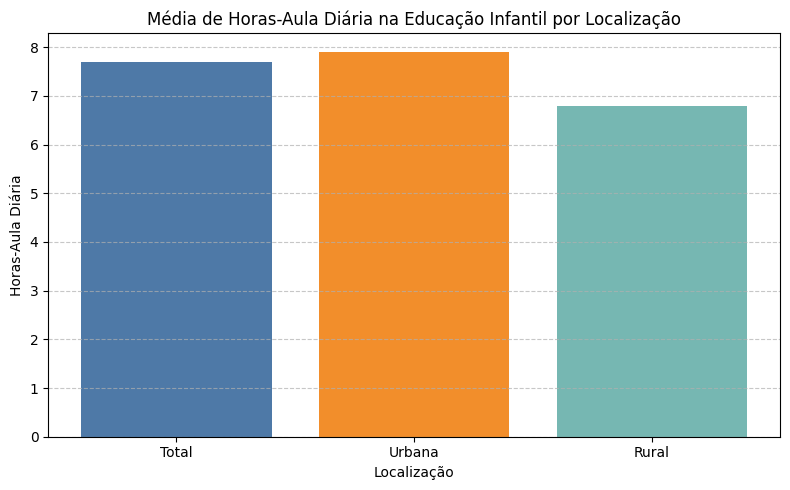

In [18]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'HAD_BRASIL_REGIOES_UFS_2024.xlsx'
df =  pd.read_excel('datasets/HAD_BRASIL_REGIOES_UFS_2024.xlsx', header=8)

df_filtrado = df[(df['NO_DEPENDENCIA'] == 'Total') & (df['NO_CATEGORIA'].isin(['Urbana', 'Rural', 'Total']))]

plt.figure(figsize=(8, 5))
plt.bar(df_filtrado['NO_CATEGORIA'], df_filtrado['ED_INF_CAT_0'], color=['#4e79a7', '#f28e2b', '#76b7b2'])
plt.title('Média de Horas-Aula Diária na Educação Infantil por Localização')
plt.xlabel('Localização')
plt.ylabel('Horas-Aula Diária')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


C:\Users\raiss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


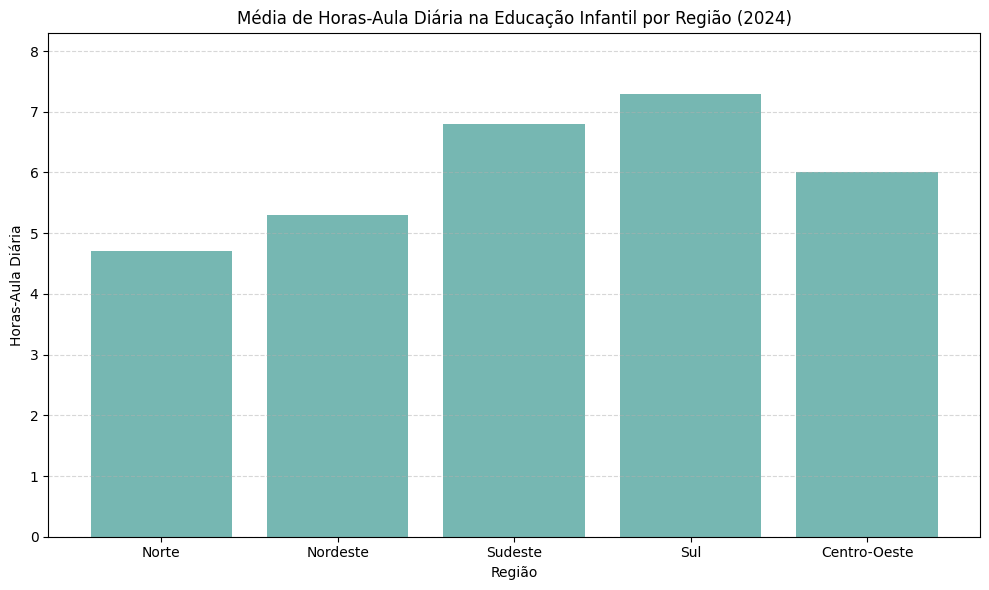

In [21]:
import pandas as pd
import matplotlib.pyplot as plt


file_path = 'HAD_BRASIL_REGIOES_UFS_2024.xlsx'
df =  pd.read_excel('datasets/HAD_BRASIL_REGIOES_UFS_2024.xlsx', header=8)
regioes = ['Norte', 'Nordeste', 'Sudeste', 'Sul', 'Centro-Oeste']


df_regioes = df[(df['UNIDGEO'].isin(regioes)) &
                (df['NO_CATEGORIA'] == 'Total') &
                (df['NO_DEPENDENCIA'] == 'Total')]


plt.figure(figsize=(10, 6))
plt.bar(df_regioes['UNIDGEO'], df_regioes['ED_INF_CAT_0'], color='#76b7b2')
plt.title('Média de Horas-Aula Diária na Educação Infantil por Região (2024)')
plt.xlabel('Região')
plt.ylabel('Horas-Aula Diária')
plt.ylim(0, df_regioes['ED_INF_CAT_0'].max() + 1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()



C:\Users\raiss\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")
C:\Users\raiss\AppData\Local\Temp\ipykernel_18340\1264501016.py:13: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  ti = float(df_total['ED_INF_CAT_0'])  # Total Ensino Infantil
C:\Users\raiss\AppData\Local\Temp\ipykernel_18340\1264501016.py:14: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  tf = float(df_total['FUN_AI_CAT_0']) + float(df_total['FUN_AF_CAT_0'])  # Total Ensino Fundamental
C:\Users\raiss\AppData\Local\Temp\ipykernel_18340\1264501016.py:15: FutureWarning: Calling float on a s

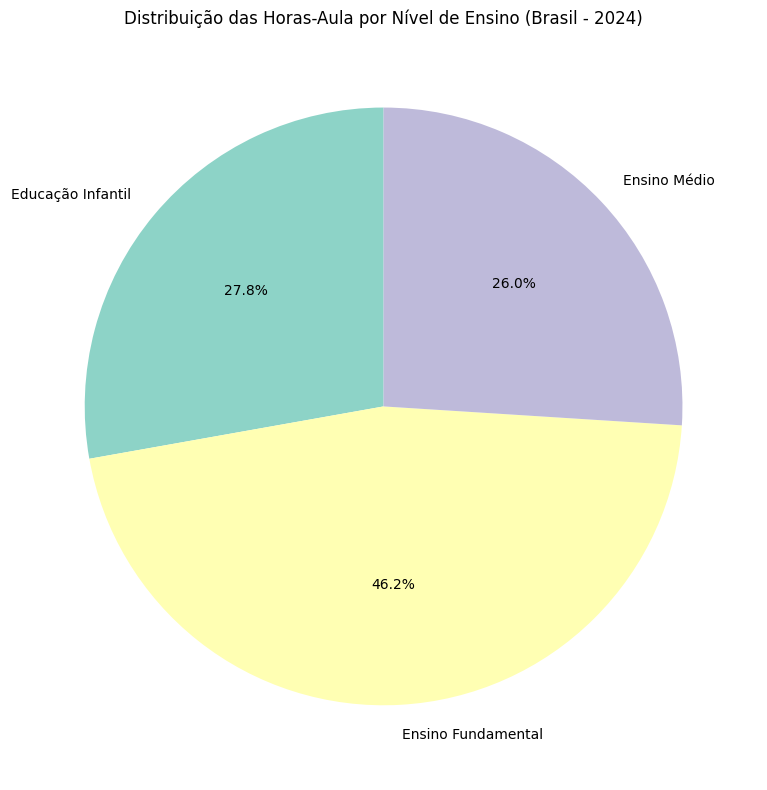

In [26]:
import pandas as pd
import matplotlib.pyplot as plt

file_path = 'datasets/HAD_BRASIL_REGIOES_UFS_2024.xlsx'
df = pd.read_excel(file_path, header=8)

# Filtro para o total do Brasil
df_total = df[(df['UNIDGEO'] == 'Brasil') & 
              (df['NO_CATEGORIA'] == 'Total') & 
              (df['NO_DEPENDENCIA'] == 'Total')]

# Definindo os totais com as novas variáveis
ti = float(df_total['ED_INF_CAT_0'])  # Total Ensino Infantil
tf = float(df_total['FUN_AI_CAT_0']) + float(df_total['FUN_AF_CAT_0'])  # Total Ensino Fundamental
tm = float(df_total['MED_CAT_0'])  # Total Ensino Médio

# Dicionário para o gráfico
etapas = {
    'Educação Infantil': ti,
    'Ensino Fundamental': tf,
    'Ensino Médio': tm
}

# Gráfico de Pizza
plt.figure(figsize=(8, 8))
plt.pie(etapas.values(), labels=etapas.keys(), autopct='%1.1f%%', startangle=90, colors=plt.cm.Set3.colors)
plt.title('Distribuição das Horas-Aula por Nível de Ensino (Brasil - 2024)')
plt.tight_layout()
plt.show()


## Exportando os dados

In [25]:
# Exportar o DataFrame had para um arquivo CSV
had.to_csv('dados_tratados_powerbi.xlsx', index=False, encoding='utf-8-sig')
